In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\cleaned_survey_data.csv")
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [6]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [7]:
# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [8]:
# 1. Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

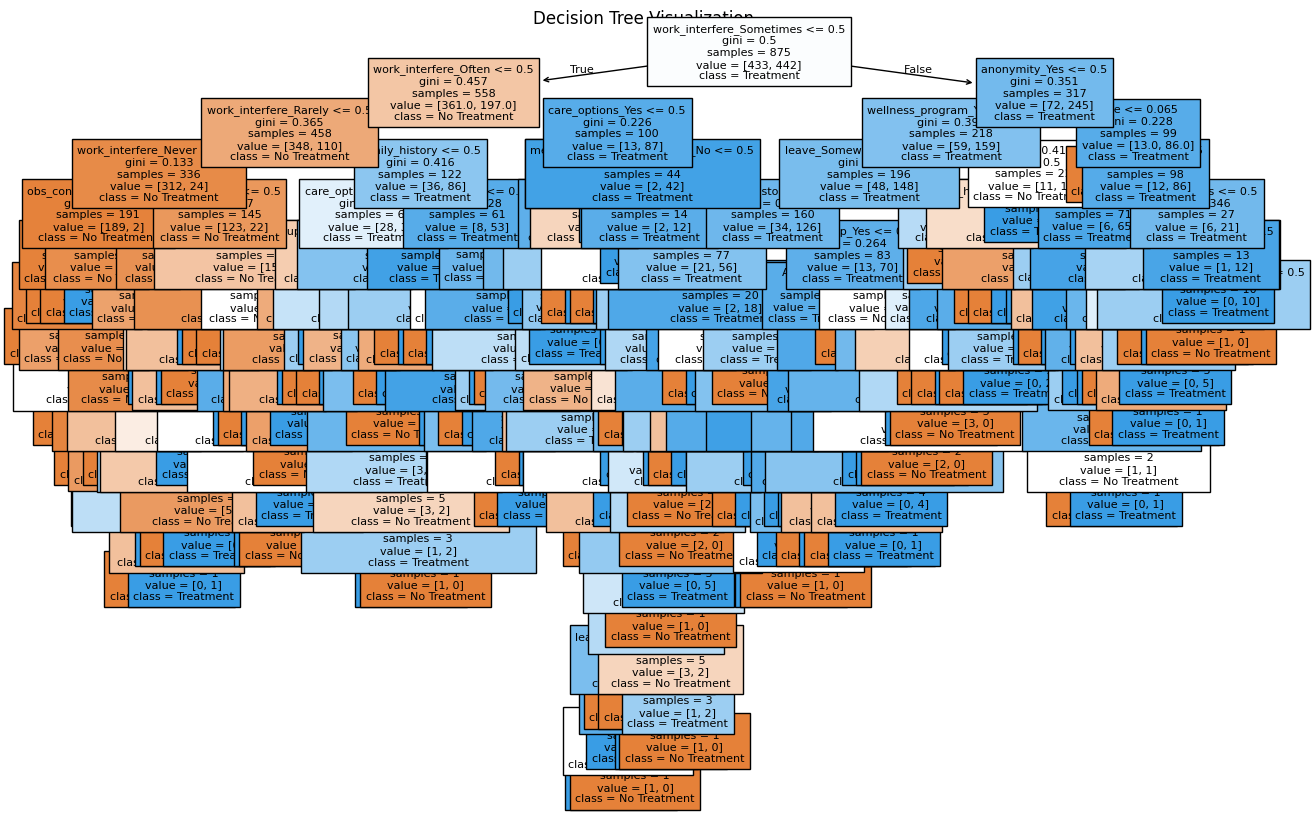

In [9]:
# Visualize the Decision Tree
target_names = ['No Treatment', 'Treatment']
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=target_names, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


--- Base Model Evaluation ---

Decision Tree:
              precision    recall  f1-score   support

No Treatment       0.73      0.74      0.74       186
   Treatment       0.74      0.73      0.74       190

    accuracy                           0.74       376
   macro avg       0.74      0.74      0.74       376
weighted avg       0.74      0.74      0.74       376



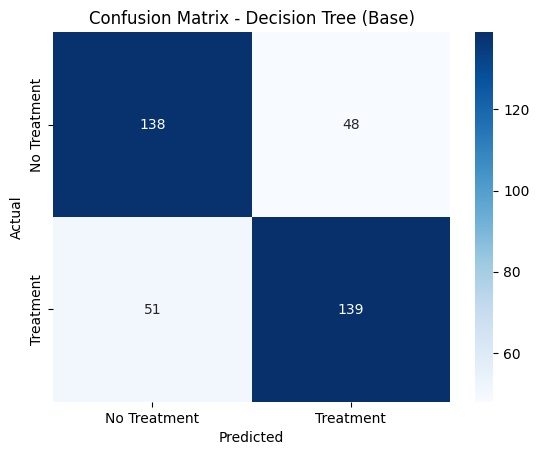

In [10]:
# --- Model Validation ---

# Evaluate base models on the test set
print("\n--- Base Model Evaluation ---")

# Decision Tree
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, dt_predictions, target_names=target_names))
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Base)')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
dictionary = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dict_search = GridSearchCV(dt, dictionary, cv=5, scoring='accuracy')

In [14]:
dict_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [15]:
optimal_tree = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

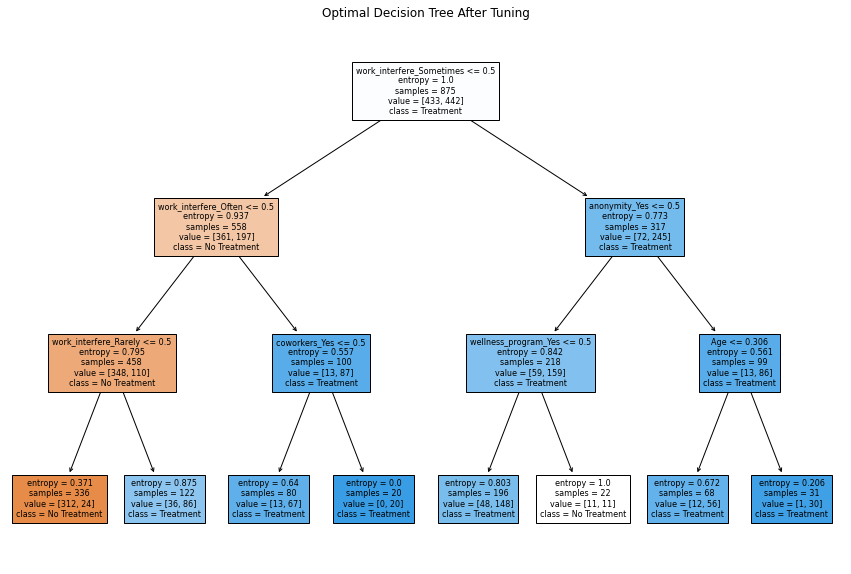

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(optimal_tree, feature_names=X_train.columns, class_names=['No Treatment', 'Treatment'], filled=True, fontsize=8)
plt.title("Optimal Decision Tree After Tuning")
plt.show()


--- Hypertuned Model Evaluation ---

Hypertuned Model:
              precision    recall  f1-score   support

No Treatment       0.85      0.69      0.77       186
   Treatment       0.75      0.88      0.81       190

    accuracy                           0.79       376
   macro avg       0.80      0.79      0.79       376
weighted avg       0.80      0.79      0.79       376



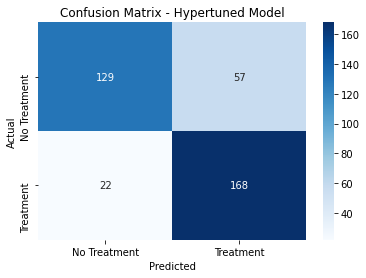

In [ ]:
# Evaluate hypertuned models
print("\n--- Hypertuned Model Evaluation ---")

hypertuned_predictions = best_tree.predict(X_test)

print("\nHypertuned Model:")
print(classification_report(y_test, hypertuned_predictions, target_names=target_names))

# Confusion Matrix
cm_hypertuned = confusion_matrix(y_test, hypertuned_predictions)

sns.heatmap(cm_hypertuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Hypertuned Model')
plt.show()



--- Learning Curve ---


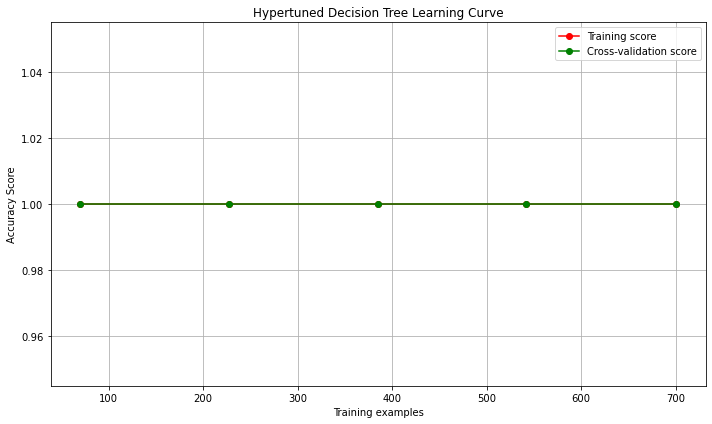

In [ ]:
# --- Learning Curve ---

print("\n--- Learning Curve ---")

def plot_learning_curve(estimator, title, X, y, axes=None, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy Score")
    axes.grid()
    axes.legend(loc="best")
    return plt

# Create and plot the learning curve for the hypertuned Decision Tree
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_learning_curve(best_tree, "Hypertuned Decision Tree Learning Curve",
                    X_train_scaled_df, y_train, axes=ax, cv=5, scoring='accuracy')
plt.tight_layout()
plt.show()
